# Load all data
from averages.csv

In [1]:
# set environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
# import raw data
path = 'averages_v2.csv'
df = pd.read_csv(path)
df.head()

,200pulse_time,200pulse,120pulse_time,120pulse,50constant_time,50constant,10constant_time,10constant,90periodic10_time,90periodic10,...,BY103pulse,BY130pulse_time,BY130pulse,BY147pulse_time,BY147pulse,BY169pulse_time,BY169pulse,BY68pulse_time,BY68pulse,320periodic50_2
0,0.0,17.78,0.0,23.62,0.0,60.55,0.0,52.37,0.0,0.239,...,0.342,0.0,0.314,0.0,0.827,0.0,0.201,0.0,0.150,51.66
1,5.0,19.42,5.0,24.43,10.0,68.05,10.0,64.09,10.0,0.237,...,0.358,5.0,0.323,5.0,0.836,5.0,0.200,5.0,0.156,50.78
2,10.0,21.48,10.0,26.81,20.0,91.63,20.0,68.76,20.0,0.257,...,0.378,10.0,0.340,10.0,0.855,10.0,0.216,10.0,0.169,51.17
3,15.0,25.37,15.0,30.69,30.0,124.12,30.0,81.22,30.0,0.328,...,0.407,15.0,0.382,15.0,0.865,15.0,0.241,15.0,0.193,53.59
4,20.0,28.37,20.0,34.47,40.0,162.77,40.0,96.51,40.0,0.412,...,0.412,20.0,0.425,20.0,0.882,20.0,0.270,20.0,0.225,59.10


# Constant 50 nM data
Scale constant data so the maximum is 1. 

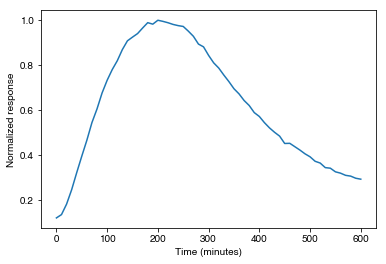

In [3]:
# Divide by max value and plot
data_50constant = df[['50constant']]/df[['50constant']].max()
plt.plot(df[['50constant_time']],data_50constant)
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')

# Single pulses
Scale single pulse data so the time where stimulus is on lines up with the scaled constant data from step 2
## Scale each pulse
### 45 minutes

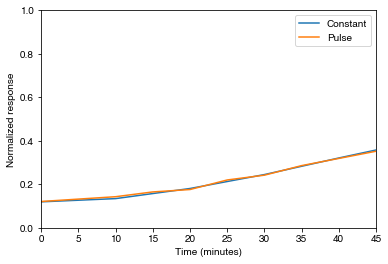

In [4]:
# Determine scaling factor
sf_45pulse = 1.1
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['45pulse_time']],df[['45pulse']]*sf_45pulse)
plt.xlim([0,45])
plt.ylim([0,1])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_45pulse = df[['45pulse']]*sf_45pulse

### 60 minutes

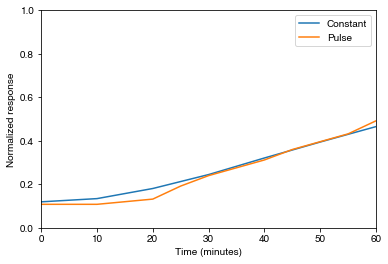

In [5]:
# Determine scaling factor
sf_60pulse = 1.2
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['60pulse_time']],df[['60pulse']]*sf_60pulse)
plt.xlim([0,60])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_60pulse = df[['60pulse']]*sf_60pulse

### 75 minutes

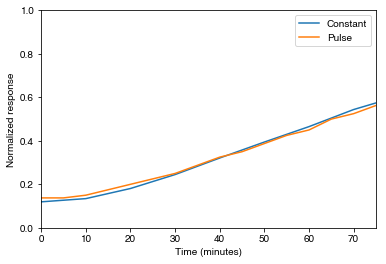

In [6]:
# Determine scaling factor
sf_75pulse = 1.25
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['75pulse_time']],df[['75pulse']]*sf_75pulse)
plt.xlim([0,75])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_75pulse = df[['75pulse']]*sf_75pulse

### 90 minutes

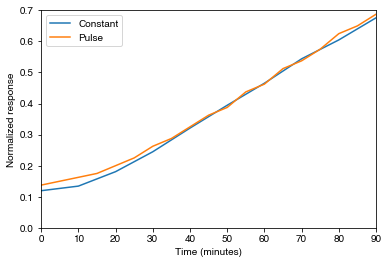

In [7]:
# Determine scaling factor
sf_90pulse = 1.25
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['90pulse_time']],df[['90pulse']]*sf_90pulse)
plt.xlim([0,90])
plt.ylim([0,0.7])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_90pulse = df[['90pulse']]*sf_90pulse

### 120 minutes

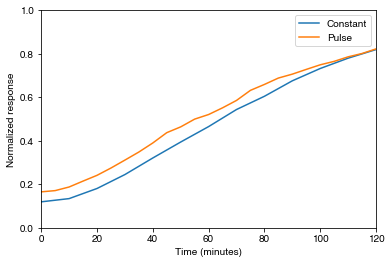

In [8]:
# Determine scaling factor
sf_120pulse = 0.007
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['120pulse_time']],df[['120pulse']]*sf_120pulse)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_120pulse = df[['120pulse']]*sf_120pulse

### 160 minutes

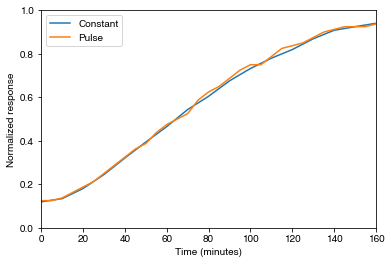

In [9]:
# Determine scaling factor
sf_160pulse = 1.25
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['160pulse_time']],df[['160pulse']]*sf_160pulse)
plt.xlim([0,160])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_160pulse = df[['160pulse']]*sf_160pulse

### 200 minutes

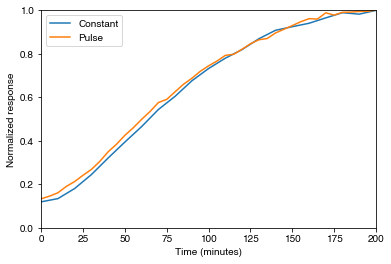

In [10]:
# Determine scaling factor
sf_200pulse = 0.0075
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['200pulse_time']],df[['200pulse']]*sf_200pulse)
plt.xlim([0,200])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_200pulse = df[['200pulse']]*sf_200pulse

## Compare single pulses 

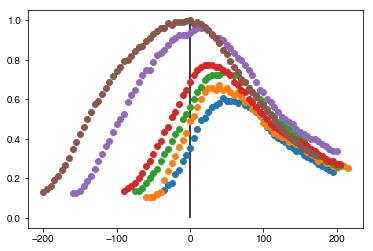

In [11]:
# Compare pulses (normalized to t0 = stimulus removal)
plt.plot(df[['45pulse_time']]-45,data_45pulse, 'o')
plt.plot(df[['60pulse_time']]-60,data_60pulse, 'o')
plt.plot(df[['75pulse_time']]-75,data_75pulse, 'o')
plt.plot(df[['90pulse_time']]-90,data_90pulse, 'o')
# plt.plot(df[['120pulse_time']]-120,data_120pulse) #something wrong with this data set
plt.plot(df[['160pulse_time']]-160,data_160pulse, 'o')
plt.plot(df[['200pulse_time']]-200,data_200pulse, 'o')
plt.vlines(0,0,1)

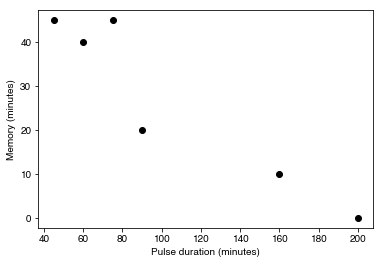

In [12]:
# Plot memory vs. duration
mem45 = data_45pulse.idxmax()*5-45
mem60 = data_60pulse.idxmax()*5-60
mem75 = data_75pulse.idxmax()*5-75
mem90 = data_90pulse.idxmax()*5-90
mem160 = data_160pulse.idxmax()*5-160
mem200 = data_200pulse.idxmax()*5-200
plt.plot([45,60,75,90,160,200],[mem45,mem60,mem75,mem90,mem160,mem200],'ko')
plt.xlabel('Pulse duration (minutes)')
plt.ylabel('Memory (minutes)')
plt.savefig('Memory vs pulse duration.png')

# Mutants
## Find scaling factor for wildtype

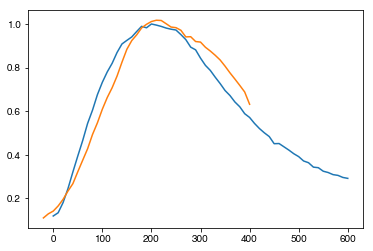

In [13]:
# Scale BY68
mutant_scaling =  0.0027
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['BY68_time']]-20,df[['BY68']]*mutant_scaling)

## Scale all other mutants

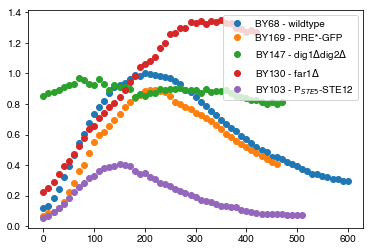

In [14]:
# Scale and ompare mutants
data_by169 = df[['BY169']]*mutant_scaling
data_by147 = df[['BY147']]*mutant_scaling
data_by130_raw = df[['BY130']]*mutant_scaling
data_by103 = df[['BY103']]*mutant_scaling
plt.plot(df[['50constant_time']],data_50constant,'o')
plt.plot(df[['BY169_time']],data_by169,'o')
plt.plot(df[['BY147_time']],data_by147,'o')
plt.plot(df[['BY130_time']],data_by130_raw,'o')
plt.plot(df[['BY103_time']],data_by103,'o')
plt.legend(['BY68 - wildtype','BY169 - PRE*-GFP','BY147 - dig1$\Delta$dig2$\Delta$', 'BY130 - far1$\Delta$', 'BY103 - P$_{STE5}$-STE12'])

## Scale full constant far1$\Delta$ data set

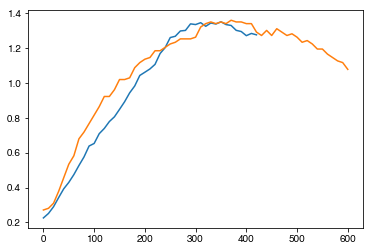

In [15]:
# Scale complete BY130
BY130_sf = 0.97
plt.plot(df[['BY130_time']],data_by130_raw)
plt.plot(df[['BY130comp_time']],df[['BY130comp']]*BY130_sf)
data_by130 = df[['BY130comp']]*BY130_sf

## Scale mutant 90 minute single pulse

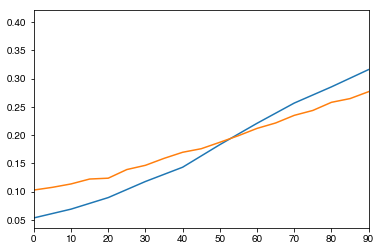

In [16]:
# Scale pulse BY103
BY103pul_sf = 0.3
plt.plot(df[['BY103_time']],data_by103)
plt.plot(df[['BY103pulse_time']],df[['BY103pulse']]*BY103pul_sf)
plt.xlim([0,90])
data_by103_pulse = df[['BY103pulse']]*BY103pul_sf

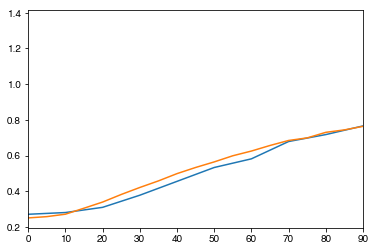

In [17]:
# Scale pulse BY130
BY130pul_sf = 0.8
plt.plot(df[['BY130_time']],data_by130)
plt.plot(df[['BY130pulse_time']],df[['BY130pulse']]*BY130pul_sf)
plt.xlim([0,90])
data_by130_pulse = df[['BY130pulse']]*BY130pul_sf

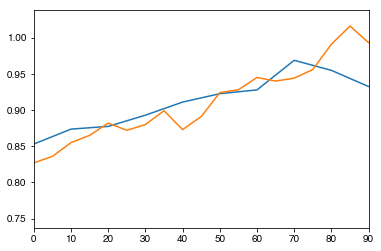

In [18]:
# Scale pulse BY147
BY147pul_sf = 1.0
plt.plot(df[['BY147_time']],data_by147)
plt.plot(df[['BY147pulse_time']],df[['BY147pulse']]*BY147pul_sf)
plt.xlim([0,90])
data_by147_pulse = df[['BY147pulse']]*BY147pul_sf

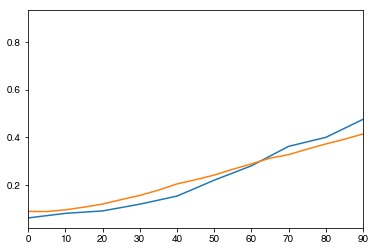

In [19]:
# Scale pulse BY169
BY169pul_sf = 0.45
plt.plot(df[['BY169_time']],data_by169)
plt.plot(df[['BY169pulse_time']],df[['BY169pulse']]*BY169pul_sf)
plt.xlim([0,90])
data_by169_pulse = df[['BY169pulse']]*BY169pul_sf

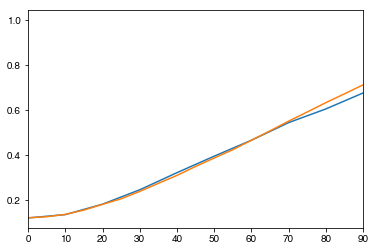

In [20]:
# Scale pulse BY68
BY68pul_sf = 0.8
plt.plot(df[['BY68_time']],data_50constant)
plt.plot(df[['BY68pulse_time']],df[['BY68pulse']]*BY68pul_sf)
plt.xlim([0,90])
data_by68_pulse = df[['BY68pulse']]*BY68pul_sf

# Periodic data (50nM)
## Scale each period
### 90 minute period

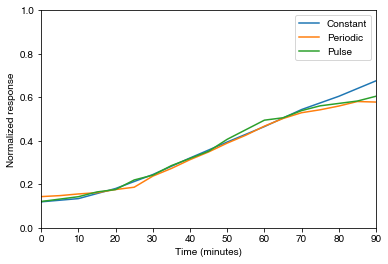

In [21]:
# Determine scaling factor
sf_90per50 = 0.0023
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['90periodic50_time']],df[['90periodic50']]*sf_90per50)
plt.plot(df[['45pulse_time']],df[['45pulse']]*sf_45pulse)
plt.xlim([0,90])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Periodic','Pulse'])
data_90per50 = df[['90periodic50']]*sf_90per50

### 120 minute period

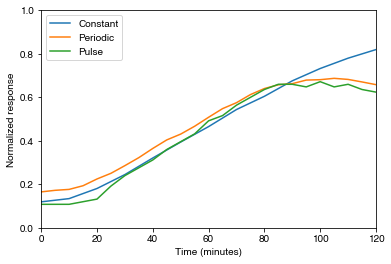

In [22]:
# Determine scaling factor
sf_120per50 = 0.0022
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['120periodic50_time']]-5,df[['120periodic50']]*sf_120per50)
plt.plot(df[['60pulse_time']],df[['60pulse']]*sf_60pulse)
plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Periodic','Pulse'])
data_120per50 = df[['120periodic50']]*sf_120per50

### 150 minute period

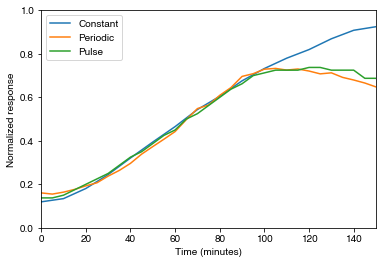

In [23]:
# Determine scaling factor
sf_150per50 = 0.0018
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['150periodic50_time']],df[['150periodic50']]*sf_150per50)
plt.plot(df[['75pulse_time']],df[['75pulse']]*sf_75pulse)
plt.xlim([0,150])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Periodic','Pulse'])
data_150per50 = df[['150periodic50']]*sf_150per50

### 180 minute period

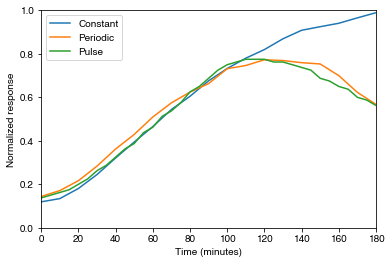

In [24]:
# Determine scaling factor
sf_180per50 = 0.0011
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['180periodic50_time']],df[['180periodic50']]*sf_180per50)
plt.plot(df[['90pulse_time']],df[['90pulse']]*sf_90pulse)
plt.xlim([0,180])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Periodic','Pulse'])
data_180per50 = df[['180periodic50']]*sf_180per50

### 240 minute period

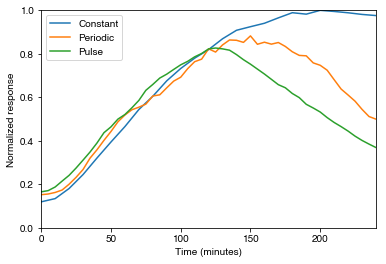

In [25]:
# Determine scaling factor
sf_240per50 = 0.00055
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['240periodic50_time']],df[['240periodic50']]*sf_240per50)
plt.plot(df[['120pulse_time']],df[['120pulse']]*sf_120pulse)
plt.xlim([0,240])
plt.ylim([0,1.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Periodic','Pulse'])
data_240per50 = df[['240periodic50']]*sf_240per50

### 320 minute period

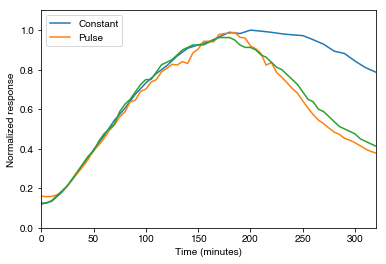

In [26]:
# Determine scaling factor
sf_320per50 = 0.0031
plt.plot(df[['50constant_time']],data_50constant)
plt.plot(df[['320periodic50_time']],df[['320periodic50_2']]*sf_320per50)
plt.plot(df[['160pulse_time']],df[['160pulse']]*sf_160pulse)
plt.xlim([0,320])
plt.ylim([0,1.1])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_320per50 = df[['320periodic50_2']]*sf_320per50

## Compare periodic data (50nM)

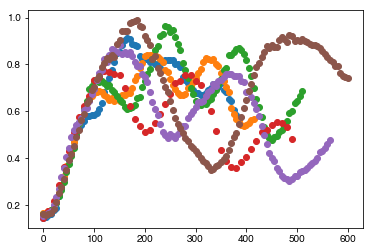

In [27]:
# Plot all periods
plt.plot(df[['90periodic50_time']],data_90per50,'o')
plt.plot(df[['120periodic50_time']],data_120per50,'o')
plt.plot(df[['150periodic50_time']],data_150per50,'o')
plt.plot(df[['180periodic50_time']],data_180per50,'o')
plt.plot(df[['240periodic50_time']],data_240per50,'o')
plt.plot(df[['320periodic50_time']],data_320per50,'o')
# plt.xlim([0,45])
# plt.ylim([0.1,0.4])

# 10nM data (constant and periodic)
## Scale constant data
Used same scaling factor as 50nM Constant

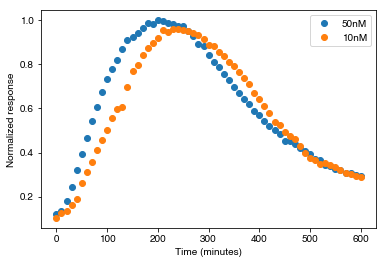

In [28]:
# Divide by 50nM max value and plot
data_10constant = df[['10constant']]/float(df[['50constant']].max())
plt.plot(df[['50constant_time']],data_50constant,'o')
plt.plot(df[['10constant_time']],data_10constant,'o')
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['50nM','10nM'])

## Scale each period
### 90 minute period

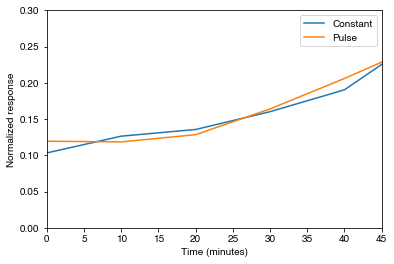

In [29]:
# Determine scaling factor
sf_90per10 = 0.5
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['90periodic10_time']],df[['90periodic10']]*sf_90per10)
plt.xlim([0,45])
plt.ylim([0,0.3])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_90per10 = df[['90periodic10']]*sf_90per10

### 120 minute period

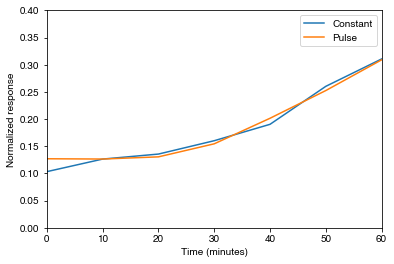

In [30]:
# Determine scaling factor
sf_120per10 = 0.5
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['120periodic10_time']],df[['120periodic10']]*sf_120per10)
plt.xlim([0,60])
plt.ylim([0,0.4])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_120per10 = df[['120periodic10']]*sf_120per10

### 150 minute period

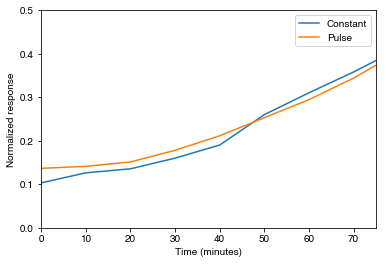

In [31]:
# Determine scaling factor
sf_150per10 = 0.67
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['150periodic10_time']],df[['150periodic10']]*sf_150per10)
plt.xlim([0,75])
plt.ylim([0,0.5])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_150per10 = df[['150periodic10']]*sf_150per10

### 180 minute period

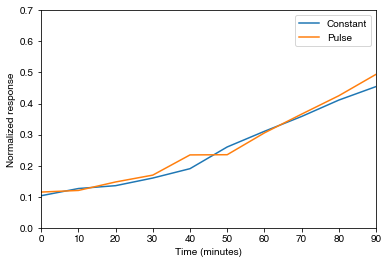

In [32]:
# Determine scaling factor
sf_180per10 = 0.65
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['180periodic10_time']],df[['180periodic10']]*sf_180per10)
plt.xlim([0,90])
plt.ylim([0,0.7])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_180per10 = df[['180periodic10']]*sf_180per10

### 240 minute period

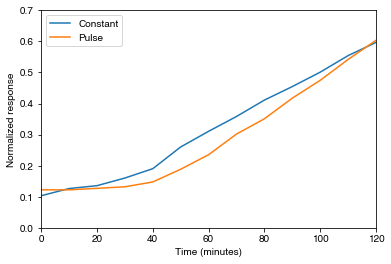

In [33]:
# Determine scaling factor
sf_240per10 = 0.82
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['240periodic10_time']],df[['240periodic10']]*sf_240per10)
plt.xlim([0,120])
plt.ylim([0,0.7])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_240per10 = df[['240periodic10']]*sf_240per10

### 320 minute period

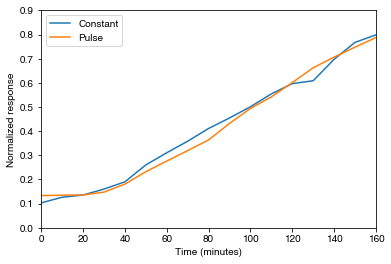

In [34]:
# Determine scaling factor
sf_320per10 = 0.9
plt.plot(df[['10constant_time']],data_10constant)
plt.plot(df[['320periodic10_time']],df[['320periodic10']]*sf_320per10)
plt.xlim([0,160])
plt.ylim([0,0.9])
plt.xlabel('Time (minutes)')
plt.ylabel('Normalized response')
plt.legend(['Constant','Pulse'])
data_320per10 = df[['320periodic10']]*sf_320per10

## Compare all periods (10nM)

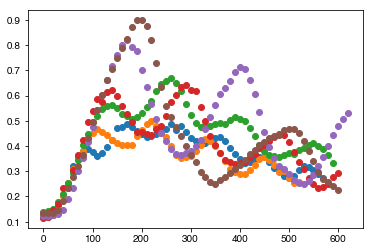

In [35]:
# Plot all periods
plt.plot(df[['90periodic10_time']],data_90per10,'o')
plt.plot(df[['120periodic10_time']],data_120per10,'o')
plt.plot(df[['150periodic10_time']],data_150per10,'o')
plt.plot(df[['180periodic10_time']],data_180per10,'o')
plt.plot(df[['240periodic10_time']],data_240per10,'o')
plt.plot(df[['320periodic10_time']],data_320per10,'o')

# Save pickle file for evolutionary algorithm

In [36]:
# Constant data (50nM)
times_50constant = []
times_50constant.append(np.array(df[['50constant_time']]))
times_50constant.append(np.array(df[['BY103_time']]))
times_50constant.append(np.array(df[['BY130comp_time']]))
times_50constant.append(np.array(df[['BY147_time']]))
times_50constant.append(np.array(df[['BY169_time']]))

data_50constants = []
data_50constants.append(np.array(data_50constant))
data_50constants.append(np.array(data_by103))
data_50constants.append(np.array(data_by130))
data_50constants.append(np.array(data_by147))
data_50constants.append(np.array(data_by169))

In [37]:
# Single pulse data (50nM)
times_50pulse = []
times_50pulse.append(np.array(df[['45pulse_time']]))
times_50pulse.append(np.array(df[['60pulse_time']]))
times_50pulse.append(np.array(df[['75pulse_time']]))
times_50pulse.append(np.array(df[['90pulse_time']]))
times_50pulse.append(np.array(df[['160pulse_time']]))
times_50pulse.append(np.array(df[['200pulse_time']]))

data_50pulse = []
data_50pulse.append(np.array(data_45pulse))
data_50pulse.append(np.array(data_60pulse))
data_50pulse.append(np.array(data_75pulse))
data_50pulse.append(np.array(data_90pulse))
data_50pulse.append(np.array(data_160pulse))
data_50pulse.append(np.array(data_200pulse))

In [38]:
# Periodic data (50nM)
times_50periodic = []
times_50periodic.append(np.array(df[['90periodic50_time']]))
times_50periodic.append(np.array(df[['120periodic50_time']]))
times_50periodic.append(np.array(df[['150periodic50_time']]))
times_50periodic.append(np.array(df[['180periodic50_time']]))
times_50periodic.append(np.array(df[['240periodic50_time']]))
times_50periodic.append(np.array(df[['320periodic50_time']]))

data_50periodic = []
data_50periodic.append(np.array(data_90per50))
data_50periodic.append(np.array(data_120per50))
data_50periodic.append(np.array(data_150per50))
data_50periodic.append(np.array(data_180per50))
data_50periodic.append(np.array(data_240per50))
data_50periodic.append(np.array(data_320per50))

In [39]:
# Periodic and constant data (10nM)
times_10periodic = []
times_10periodic.append(np.array(df[['10constant_time']]))
times_10periodic.append(np.array(df[['90periodic10_time']]))
times_10periodic.append(np.array(df[['120periodic10_time']]))
times_10periodic.append(np.array(df[['150periodic10_time']]))
times_10periodic.append(np.array(df[['180periodic10_time']]))
times_10periodic.append(np.array(df[['240periodic10_time']]))
times_10periodic.append(np.array(df[['320periodic10_time']]))

data_10periodic = []
data_10periodic.append(np.array(data_10constant))
data_10periodic.append(np.array(data_90per10))
data_10periodic.append(np.array(data_120per10))
data_10periodic.append(np.array(data_150per10))
data_10periodic.append(np.array(data_180per10))
data_10periodic.append(np.array(data_240per10))
data_10periodic.append(np.array(data_320per10))

In [40]:
# Mutant pulse data
times_mutpulse = []
times_mutpulse.append(np.array(df[['BY103pulse_time']]))
times_mutpulse.append(np.array(df[['BY130pulse_time']]))
times_mutpulse.append(np.array(df[['BY147pulse_time']]))
times_mutpulse.append(np.array(df[['BY169pulse_time']]))
times_mutpulse.append(np.array(df[['BY68pulse_time']]))

data_mutpulse = []
data_mutpulse.append(np.array(data_by103_pulse))
data_mutpulse.append(np.array(data_by130_pulse))
data_mutpulse.append(np.array(data_by147_pulse))
data_mutpulse.append(np.array(data_by169_pulse))
data_mutpulse.append(np.array(data_by68_pulse))

In [41]:
# Save file
experimental_data = [times_50constant, data_50constants, times_50pulse, data_50pulse, times_50periodic, data_50periodic, times_10periodic, data_10periodic, times_mutpulse, data_mutpulse]
filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/Mating-Model/Data/Experimental Data/experimental_v2.pickled'
pickle.dump(experimental_data, open(filename, 'wb'))